<a href="https://colab.research.google.com/github/zaheerhussain10/Neural_networks_with_tensorflow/blob/main/Cnn_ComplexImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget \https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2024-07-07 06:38:29--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  88.9MB/s    in 1.6s    

2024-07-07 06:38:31 (88.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [16]:
train_horse_names= os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names= os.listdir(train_human_dir)
print(train_human_names[:10])


['horse02-4.png', 'horse39-0.png', 'horse50-8.png', 'horse39-2.png', 'horse06-8.png', 'horse20-7.png', 'horse27-3.png', 'horse43-7.png', 'horse41-1.png', 'horse18-2.png']
['human06-12.png', 'human06-11.png', 'human08-27.png', 'human13-18.png', 'human09-10.png', 'human12-09.png', 'human08-02.png', 'human16-15.png', 'human15-09.png', 'human11-23.png']


In [5]:
print('total training horse images:',len(os.listdir(train_horse_dir)))
print('total training human images:',len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

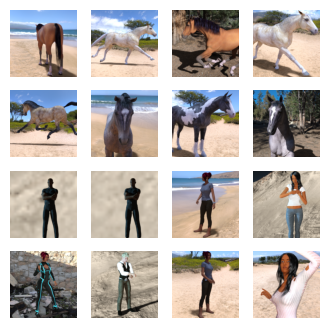

In [7]:
fig=plt.gcf()
fig.set_size_inches(ncols,nrows)
pic_index+=8

next_horse_pic= [os.path.join(train_horse_dir,fname) for fname in os.listdir(train_horse_dir)[pic_index-8:pic_index]]
next_human_pic= [os.path.join(train_human_dir,fname) for fname in os.listdir(train_human_dir)[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pic+next_human_pic):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img =mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


In [8]:
import tensorflow as tf
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [10]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 0.8739 - accuracy: 0.5195
Epoch 2/15
8/8 [==============================] - 8s 995ms/step - loss: 0.6687 - accuracy: 0.6385
Epoch 3/15
8/8 [==============================] - 7s 807ms/step - loss: 0.6245 - accuracy: 0.6196
Epoch 4/15
8/8 [==============================] - 7s 768ms/step - loss: 0.6014 - accuracy: 0.6885
Epoch 5/15
8/8 [==============================] - 7s 822ms/step - loss: 0.5477 - accuracy: 0.8065
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.2589 - accuracy: 0.9072
Epoch 7/15
8/8 [==============================] - 6s 773ms/step - loss: 0.3778 - accuracy: 0.8776
Epoch 8/15
8/8 [==============================] - 7s 774ms/step - loss: 0.1222 - accuracy: 0.9566
Epoch 9/15
8/8 [==============================] - 7s 870ms/step - loss: 0.4884 - accuracy: 0.8710
Epoch 10/15
8/8 [==============================] - 8s 875ms/step - loss: 0.1469 - accuracy: 0.9533
Epoch 11/15
8/8 [=======

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving Screenshot 2024-07-07 121106.png to Screenshot 2024-07-07 121106.png
1/1 [==============================] - 0s 435ms/step
[0.]
Screenshot 2024-07-07 121106.png is a horse


1/1 [==============================] - 0s 100ms/step


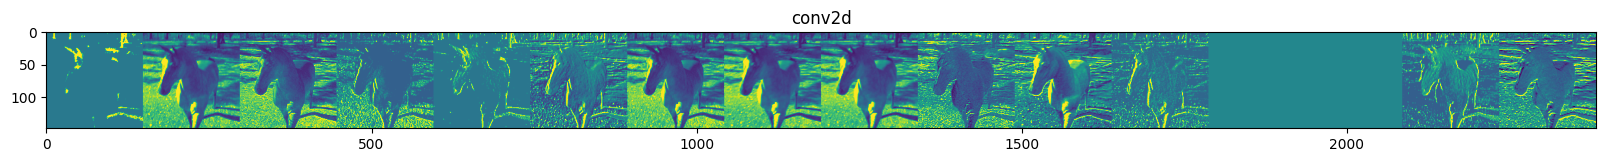

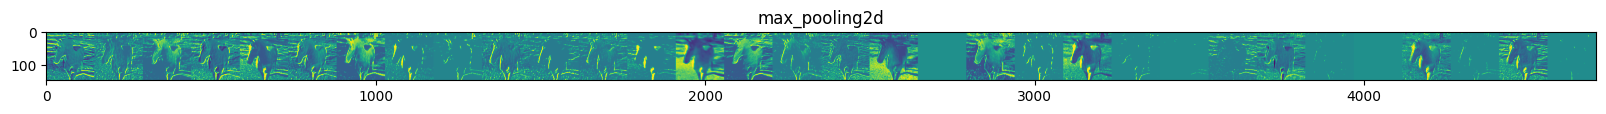

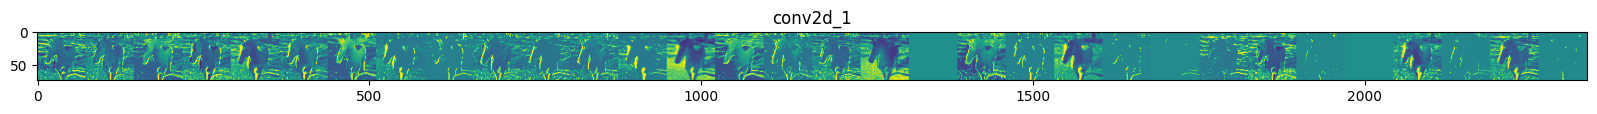

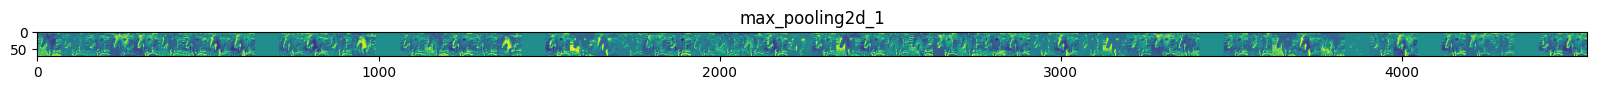

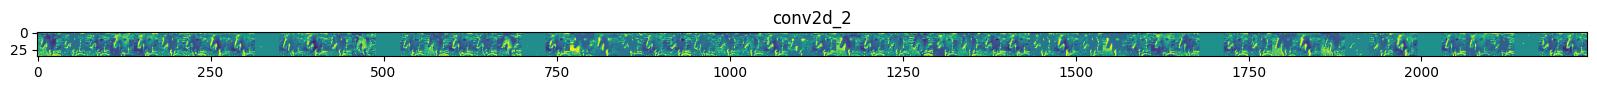

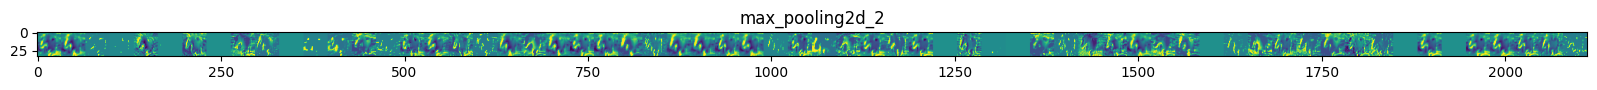

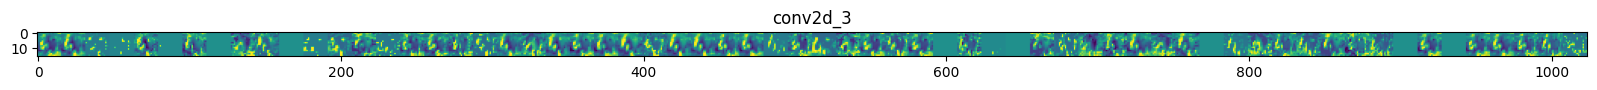

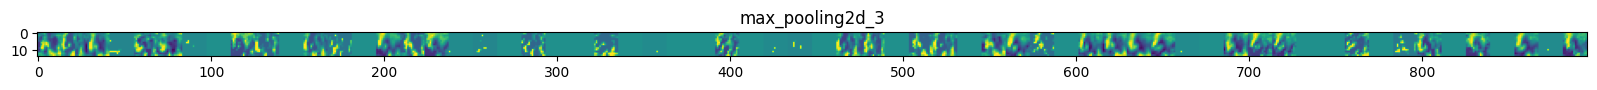

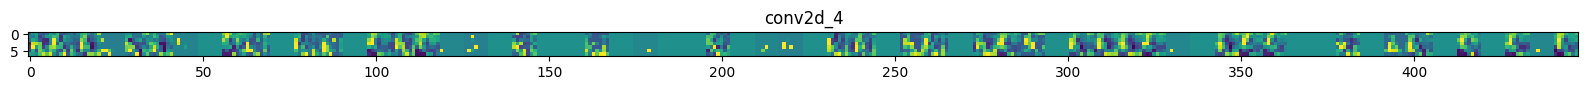

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')